# 파이썬으로 배우는 머신러닝 4강


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##벡터
- 몇가지 숫자를 나란히 나타낸 것
- 크기와 방향을 가지며 크기만 있고 방향을 가지지 않는 스칼라와 반대되는 개념

In [ ]:
# 가로벡터
a = np.array([1,2])
print(a)

[1 2]


In [ ]:
# 세로벡터
b = np.array([[1],[2]]) #2차원 배열, 세로백터 형태
print(b)

[[1]
 [2]]


In [ ]:
# 벡터 덧셈, 뺄셈, 스칼라 곱셈
a = np.array([1, 2])
b = np.array([3, 4])
print(a + b)
print(a - b)
print(2 * a)

[4 6]
[-2 -2]
[2 4]


###내적
같은 차원을 가진 두 벡터에서 대응하는 요소를 곱한 뒤 더한 값

내적은 두 벡터의 유사성과 관련이 있음
- 내적 값이 크다 : 두 벡터가 비슷한 방향을 향함.
- 내적 값이 작다 : 두 벡터가 수직에 가까울 때. → 완전히 수직이라면 값이 0

In [ ]:
a = np.array([1, 2])
b = np.array([3, 4])
print(a.dot(b))

11


###벡터의 크기

In [ ]:
a = np.array([1, 2])
b = np.array([3, 4])
print(np.linalg.norm(a))

2.23606797749979


In [ ]:
a = np.array([[1,2],[3,4]]) #모든 요소를 제곱해서 더함
print(np.linalg.norm(a))

5.477225575051661


###시그마
시그마를 for문을 통해 표현할 수 있음. but 내적으로도 표현 가능하며 내적이 계산 처리가 빠름!

###곱의 기호
모든 요소를 곱함.

## 미분
기울기를 도출하는 방법 -> 최적화 문제 해결에 적합
- 연쇄법칙(chain rule) : 합성함수의 미분으로 바깥함수 미분 후 안쪽함수 미분! 단계별로 진행
- 편미분 : 편미분하는 변수에만 주목해서 미분하기
- 경사 : 기울기 벡터, gradiant라 불리며 기울기가 가장 큰 방향과 그 크기를 나타냄.

In [ ]:
#경사를 그림으로 나타내기
def f(w0, w1):                          # f의 정의
  return w0**2 + 2 * w0 * w1 +3
def df_dw0(w0, w1):                     # f의 w0에 대한 편미분
  return 2 * w0 + 2 * w1
def df_dw1(w0, w1):                     # f의 w1에 대한 편미분
  return 2 * w0 + 0 * w1

In [ ]:
w_range = 2
dw = 0.25
w0 = np.arange(-w_range, w_range + dw, dw) # -2부터 2.25 전까지 0.25간격으로 나눔
w1 = np.arange(-w_range, w_range + dw, dw)
wn = w0.shape[0] # w0의 요소 개수 -> w_range와 dw로 정의된 범위 내의 요소 수를 나타냄
ww0 , ww1 = np.meshgrid(w0, w1) # w0와 w1으로 좌표 그리드 생성 -> gradiant에 사용
#ww0은 행 방향으로 반복되어 x축 값이 변하고, ww1은 열 방향으로 반복되어 y축 값이 변함 -> i, j가 반대
# print(ww0)
# print(ww1)
ff = np.zeros((len(w0), len(w1))) #함수값 저장할 행렬 초기화
dff_dw0 = np.zeros((len(w0), len(w1))) # w0로 편미분한 값 저장할 행렬 초기화
dff_dw1 = np.zeros((len(w0), len(w1))) # w1로 편미분한 값 저장할 행렬 초기화
for i0 in range(wn):
  for i1 in range(wn):
    ff[i1, i0] = f(w0[i0], w1[i1]) # 격자의 순서가 반대이므로 값도 반대로 넣어줘야 한다.
    dff_dw0[i1, i0] = df_dw0(w0[i0], w1[i1])
    dff_dw1[i1, i0] = df_dw1(w0[i0], w1[i1])



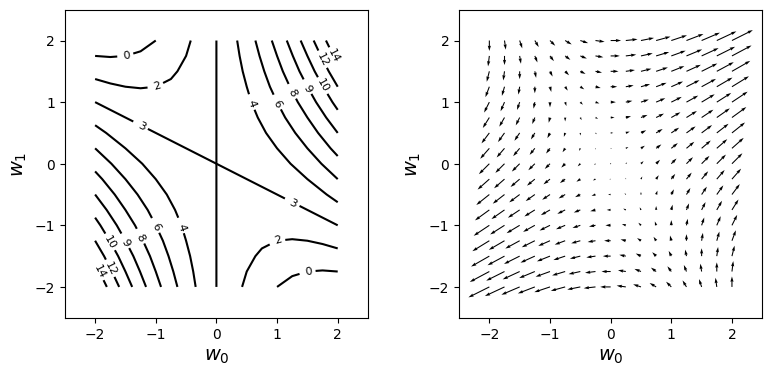

In [ ]:
plt.figure(figsize=(9, 4)) #가로 9, 세로 4
plt.subplots_adjust(wspace=0.3)
plt.subplot(1,2,1)
cont = plt.contour(ww0, ww1, ff, 10, colors='k') # f의 등고선 표시 10 -> 등고선의 갯수를 나타냄 k -> 검정색
#ww0과 ww1은 각각 x, y 좌표 값을 담은 2d배열
#ff 등고선의 높이를 나타내는 2d 배열 -> 각 좌표의 함숫값에 해당
cont.clabel(fmt='%2.0f', fontsize=8) # 숫자 넣기
plt.xticks(range(-w_range, w_range + 1, 1)) # 눈금 설정
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + 0.5)  # 범위 설정
plt.ylim(-w_range - 0.5, w_range + 0.5)
plt.xlabel('$w_0$', fontsize= 14)  # label 추가
plt.ylabel('$w_1$', fontsize= 14)

# print(dff_dw1)
plt.subplot(1,2,2)
plt.quiver(ww0, ww1, dff_dw0, dff_dw1) # (ww0, ww1) 부터 방향 (dff_dw0, dff_dw1)의 화살표를 그린다.
# 벡터값의 크기가 화살표의 크기를 결정하고, 방향이 화살표의 방향을 결정한다.
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.xticks(range(-w_range, w_range + 1, 1))
plt.yticks(range(-w_range, w_range + 1, 1))
plt.xlim(-w_range - 0.5, w_range + 0.5)
plt.ylim(-w_range - 0.5, w_range + 0.5)

plt.show()

- 편미분 연쇄법칙
- 일반적으로 머신러닝에서 미분 후 시그마를 계산함


## 행렬
벡터를 가로 세로로 표처럼 늘어놓은 것

In [ ]:
#덧셈과 뺄셈 -> 크기가 같아야 함
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[7,8,9],[10,11,12]])
print(A+B)
print(A-B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


In [ ]:
#행렬의 스칼라 배
A = np.array([[1,2,3],[4,5,6]])
print(2 * A)

[[ 2  4  6]
 [ 8 10 12]]


In [ ]:
#행렬의 곱 -> A B를 벡터로 간주하게 되면 내적과 같음
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print(A.dot(B))

32


### 단위행렬
대각선 성분이 1이고, 그 외에는 0인 특별한 행렬 I

In [ ]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 역행렬
- 역수와 동일한 의미
- 역행렬이 존재하지 않는 행렬도 있음에 주의

In [ ]:
A = np.array([[1, 2],[3, 4]])
invA = np.linalg.inv(A)
print(invA)

[[-2.   1. ]
 [ 1.5 -0.5]]


### 전치
세로벡터 -> 가로벡터, 가로벡터 -> 세로벡터

In [ ]:
A = np.array([[1, 2, 3],[4, 5, 6]])
print(A)
print(A.T)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


### 행렬과 사상
- 벡터는 좌표라 해석
- 사상 : 그룹에서 그룹에 대응 관계를 제공하는 규칙 -> 하나의 집합을 다른 집합으로 대응시키는 함수
- 행렬은 선형사상으로 분류 -> 행렬 연산이 선형성을 유지하기 때문에

## 지수함수 Y= a**x
- a > 1인 경우 단조증가
- 0 < a < 1 의 경우 단조감소
- 출력은 항상 양수

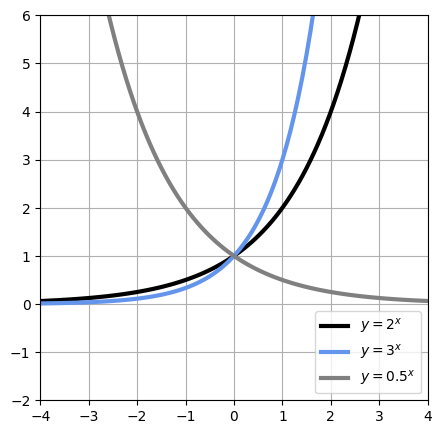

In [ ]:
x = np.linspace(-4, 4 ,100) #-4부터 4까지의 구간을 100등분한 값
y = 2**x
y2 = 3**x
y3 = 0.5**x

plt.figure(figsize=(5,5))
plt.plot(x, y, 'black', linewidth = 3, label = '$y=2^x$')
plt.plot(x, y2, 'cornflowerblue', linewidth = 3, label = '$y=3^x$')
plt.plot(x, y3, 'gray', linewidth = 3, label = '$y=0.5^x$')
plt.ylim(-2,6)
plt.xlim(-4,4)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

## 로그함수 y= log a x
- 지수함수의 역함수
- y=x에서 y=a**x와 대칭
- a > 0에서만 정의됨
- x가 커질수록 그래프가 증가하지만, 기울기는 점점 완만해짐
- 곱셈을 덧셈으로 변환 가능
- 로그를 취해도 최솟값을 취하는 값은 변하지 않는다. -> 단조증가함수니깐

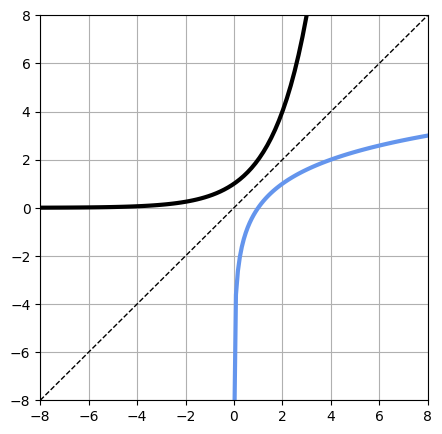

In [ ]:
x = np.linspace(-8, 8, 100)
y = 2**x

x2 = np.linspace(0.001, 8, 100) # log(0)은 에러이므로 포함하지 않음
y2 = np.log(x2)/np.log(2) # 밑이 2인 로그
plt.figure(figsize=(5,5))
plt.plot(x, y, 'black', linewidth = 3)
plt.plot(x2, y2, 'cornflowerblue', linewidth = 3)
plt.plot(x, x, 'black', linestyle='--', linewidth = 1)
plt.ylim(-8,8)
plt.xlim(-8,8)
plt.grid(True)
plt.show()

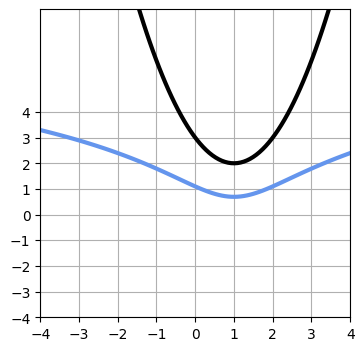

In [ ]:
x = np.linspace(-4, 4, 100)
y =(x-1)**2 +2
logy = np.log(y)

plt.figure(figsize =(4,4))
plt.plot(x,y,'black',linewidth=3)
plt.plot(x, logy, 'cornflowerblue', linewidth=3)
plt.xticks(range(-4,9,1))
plt.yticks(range(-4,5,1))
plt.ylim(-4,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

### 지수함수의 미분
y = a**x
dx/dy = a*xlog(a)

- a == e 인 경우, 미분해도 함수의 형태가 변하지 않음.

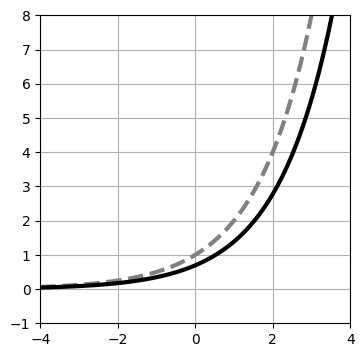

In [ ]:
x = np.linspace(-4, 4, 100)
a = 2
y = a**x
dy = np.log(a) * y

plt.figure(figsize= (4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3)
plt.plot(x, dy, 'black', linewidth=3)
plt.ylim(-1,8)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

### 로그함수의 미분

y = log(x)

dy/dx = 1/x

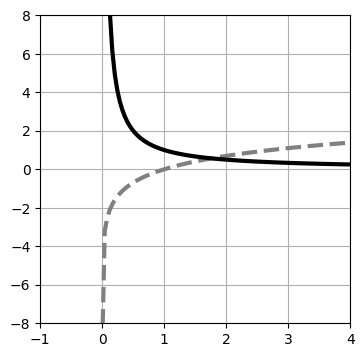

In [ ]:
x = np.linspace(0.0001, 4, 100) #0이하로 정의 불가능
y = np.log(x)
dy = 1 / x

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'gray', linestyle='--', linewidth=3)
plt.plot(x, dy, 'black', linewidth=3)
plt.ylim(-8,8)
plt.xlim(-1,4)
plt.grid(True)
plt.show()

## 시그모이드 함수

y = 1/(1+e**(-x))

y = 1/(1+exp(-x))

dy/dx = y(1-y)

- 부드러운 계단 형태
- 0 ~ 1 사이로 변환하는 단조 증가 함수
- 확률을 나타낼 때 사용


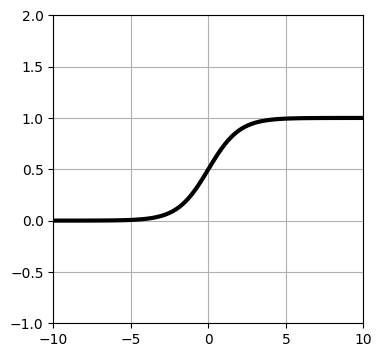

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.figure(figsize=(4, 4))
plt.plot(x, y, 'black', linewidth=3)

plt.ylim(-1, 2)
plt.xlim(-10, 10)
plt.grid(True)
plt.show()

## 소프트맥스 함수

- 확률값으로 변환 -> 합이 1이 됨.
- 대소관계 유지

In [ ]:
def softmax(x0, x1, x2):
  u = np.exp(x0) + np.exp(x1) + np.exp(x2)
  return np.exp(x0) / u, np.exp(x1) / u, np.exp(x2) / u
y = softmax(2, 1, -1)
print(np.round(y, 2)) #둘째자리까지 반올림
print(np.sum(y))


[0.71 0.26 0.04]
1.0


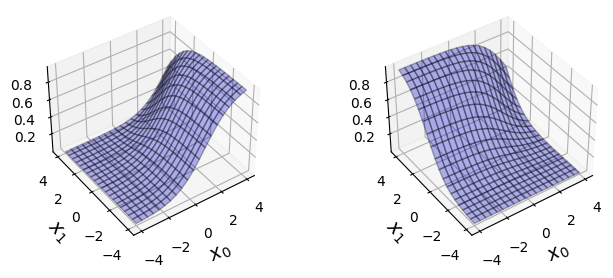

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

xn = 20 # 생성할 데이터 포인트 갯수
x0 = np.linspace(-4, 4, xn) # -4부터 4사이의 값을 xn개로 선형적으로 나눈 값을 포함하는 1차원 배열
x1 = np.linspace(-4, 4, xn)

y = np.zeros((xn, xn, 3)) #3차원 배열
for i0 in range(xn):
  for i1 in range(xn):
    y[i1, i0, :] =softmax(x0[i0], x1[i1], 1) # x2고정해서 y에 넣기 -> 함수의 입출력은 보통 벡터형태이므로 3차원 공간에서 그릴 수 없음!

xx0, xx1 = np.meshgrid(x0, x1)
plt.figure(figsize=(8, 3))
for i in range(2):
  ax = plt.subplot(1, 2, i+1, projection='3d')
  ax.plot_surface(xx0, xx1, y[:,:,i], rstride=1, cstride=1, alpha=0.3, color='blue', edgecolor='black')
  ax.set_xlabel('$x_0$', fontsize=14)
  ax.set_ylabel('$x_1$', fontsize=14)
  ax.view_init(40, -125)
plt.show()

## 가우스함수

- x = 0을 중심으로 종 모양
- 곡선을 근사하는 기저함수
  * 기저함수 : 함수 공간의 기저인 함수 -> 선형결합을 통한 계산이 가능한 형태로 만들어 주는 함수
- 확률 분포를 나타내는 형태 -> x에 관한 적분이 1이됨.


<function matplotlib.pyplot.show(close=None, block=None)>

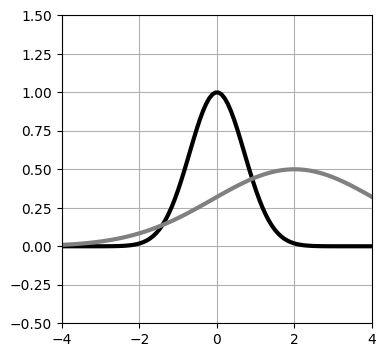

In [ ]:
def gauss(mu, sigma, a): #평균, 표준편차, 높이
  return a * np.exp(-(x - mu)**2 / sigma**2)

x = np.linspace(-4, 4, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, gauss(0, 1, 1), 'black', linewidth=3) # x=0이 중심
plt.plot(x, gauss(2, 3, 0.5), 'gray', linewidth=3) # 조절한 경우
plt.ylim(-.5, 1.5)
plt.xlim(-4, 4)
plt.grid(True)
plt.show

## 2차원 가우스 함수

- 확률 분포를 나타내는 경우:
  - 적분 값이 1이어야 함.

### 공분산
- 2개의 확률 변수의 상관 정도를 나타냄
  - 두 변수의 변화 경향성이 유사하면 양수
  - 두 변수가 반대 경향성을 보이면 음수


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def gauss(x, mu, sigma): #데이터, 평균, 공분산행렬
  N, D = x.shape #데이터 개수, 데이터 차원
  c1 = 1 / (2 * np.pi)**(D / 2) # 가우시안 분포의 상수항을 계산, 부피 보정을 위해 ** D/2를 해줌.
  c2 = 1 / (np.linalg.det(sigma)**(1 / 2)) # 공분산 행렬의 행렬식 구함 -> 행렬의 크기를 나타냄
  inv_sigma = np.linalg.inv(sigma) #공분산행렬의 역행렬 계산
  c3 = x - mu
  c4 = np.dot(c3, inv_sigma)
  c5 = np.zeros(N)
  for d in range(D):
    c5 = c5 + c4[:, d] * c3[:, d] #가우시안 분포의 확률을 계산
  p = c1 * c2 * np.exp(-c5 / 2)
  return p

In [ ]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np.array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


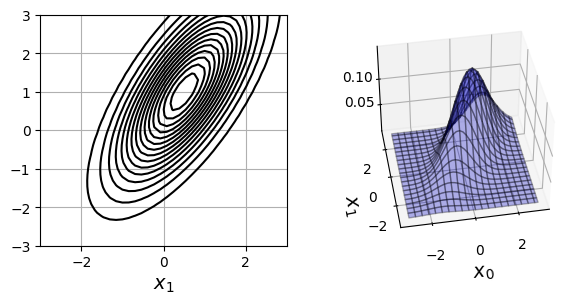

In [ ]:
# 2차 가우스 함수 그려보기

X_range0 = [-3, 3]
X_range1 = [-3, 3]


def show_contour_gauss (mu, sig):
  xn= 40 # 등고선표시해상도
  x0 = np. linspace(X_range0[0], X_range0[1], xn)
  x1 = np. linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 =np.meshgrid(x0, x1)
  x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))] #두번째 인자는 튜플로 전달해야 해서 괄호 수정이 필요!
  f= gauss(x, mu, sig)
  f=f. reshape(xn, xn)
  f= f.T
  cont = plt. contour (xx0, xx1, f, 15, colors='k')
  plt.grid(True)


def show3d_gauss(ax, mu, sig):
  xn = 40
  x0 = np.linspace(X_range0[0], X_range0[1], xn)
  x1 = np.linspace(X_range1[0], X_range1[1], xn)
  xx0, xx1 = np.meshgrid(x0, x1)
  x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))] #여기도!
  f = gauss(x, mu, sig)
  f = f.reshape(xn, xn)
  f = f.T
  ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2, alpha=0.3, color='blue', edgecolor='black')

mu = np.array([1, 0.5]) #중심이 1, 0.5 -> 평균벡터?
sigma = np.array([[2, 1],[1, 1]]) # 1로 양수니까 상향확산분포
Fig = plt.figure(1, figsize=(7, 3))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.xlabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1, 2, 2, projection = '3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()